In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib 
import IPython.display 
import sklearn.tree 
import pydotplus
import os

In [2]:
data_doh = pd.read_csv('12-benign-doh.csv', delimiter=',')
data_doh['DoH'] = 'DoH'
data_mal = pd.read_csv('mal-dns2tcp.csv', delimiter=',')
df2_malic = pd.read_csv('mal-dnscat2.csv', delimiter=',')
df3_malic = pd.read_csv('mal-iodine.csv', delimiter=',')
data_mal = pd.concat([data_mal,df2_malic])
data_mal = pd.concat([data_mal,df3_malic])
data_mal['DoH'] = 'DoH'
data_doh = pd.concat([data_doh,data_mal])
data_doh = data_doh.rename(columns={'DoH': 'Label'})
print(f'Number of malicious = {len(data_doh)}')
data_doh.head()

Number of malicious = 269776


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:49,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,DoH
1,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:50,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,DoH
2,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:52,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,DoH
3,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:54,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,DoH
4,176.103.130.131,192.168.20.191,443,50749,2020/1/14 15:56,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,DoH


In [3]:
print(data_doh.groupby('Label').size())

Label
DoH    269776
dtype: int64


In [4]:
data_nodoh = pd.read_csv('12-benign-nodoh-firefox.csv', delimiter=',')
data_nodoh1 = pd.read_csv('12-benign-nohoh-chrome.csv', delimiter=',')
data_nodoh = pd.concat([data_nodoh,data_nodoh1])
data_nodoh['DoH'] = 'NonDoH' 
data_nodoh = data_nodoh.rename(columns={'DoH': 'Label'})
print(f'Number of malicious = {len(data_nodoh)}')
data_nodoh.head()

Number of malicious = 897493


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.111,8.8.8.8,49972,443,2019/12/10 13:14,0.017147,171,9972.589957,105,6123.520149,...,0.707107,0.000000,0.000000,0.017120,0.017120,0.017120,-10.000000,-10.000000,0.000000,NonDoH
1,192.168.20.111,8.8.8.8,50028,443,2019/12/10 13:14,0.954806,2555,2675.936263,5675,5943.615771,...,1.353916,0.000084,0.009147,0.010709,0.008997,0.000004,0.561552,1.170332,0.854139,NonDoH
2,192.168.20.111,8.8.8.8,50092,443,2019/12/10 13:14,1.646289,8465,5141.867558,10845,6587.543256,...,0.549101,0.000064,0.007990,0.010945,0.015319,0.000003,-1.642429,1.369527,0.729979,NonDoH
3,192.168.20.111,54.72.229.126,60540,443,2019/12/10 13:14,1.132705,1751,1545.857041,4504,3976.322167,...,0.847468,0.001276,0.035717,0.079840,0.095209,0.000012,-1.290885,2.235006,0.447359,NonDoH
4,192.168.20.111,54.191.252.154,50928,443,2019/12/10 13:14,1.170098,2351,2009.233415,4633,3959.497410,...,0.806748,0.001192,0.034518,0.054705,0.082358,0.000016,-2.403374,1.584345,0.630991,NonDoH


In [5]:
print(data_nodoh.groupby('Label').size())

Label
NonDoH    897493
dtype: int64


In [6]:
dataset = pd.concat([data_doh,data_nodoh])

In [7]:
print(dataset.shape)
print(dataset.groupby('Label').size())

(1167269, 35)
Label
DoH       269776
NonDoH    897493
dtype: int64


In [8]:
null = dataset.isnull()
print(dataset.isnull().any().any())
print(null.sum())
dataset['ResponseTimeTimeMedian'] = dataset['ResponseTimeTimeMedian'].fillna(0)
dataset['ResponseTimeTimeSkewFromMedian'] = dataset['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataset.isnull()
print("New: ", dataset.isnull().any().any())
print("New: ", null.sum())

True
SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTimeMean                               0
PacketTi

In [9]:
dataset.columns
cols = dataset.drop(labels = ['TimeStamp','SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort','Duration','FlowBytesSent','FlowSentRate', 'PacketTimeSkewFromMedian'], axis = 1)
cols.columns

Index(['FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMedian', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
array = cols.values
print(array)
X = array[:,0:25]
Y = array[:,25]
#Y = Y.astype('int')
validation_size = 0.30
seed = 65
# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 使用 fit_transform 方法对特征进行缩放
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

[[65358 687.3888783 7474.676771 ... 0.024714815 1.174947648 'DoH']
 [101232 827.6720176 10458.1186 ... -0.07584524 1.402381756 'DoH']
 [38236 316.1086447 7300.293933 ... 0.085061157 0.958347923 'DoH']
 ...
 [66 4319.937165 30.25 ... -10.0 0.0 'NonDoH']
 [66 4329.572291 30.25 ... -10.0 0.0 'NonDoH']
 [1252 563.1405611 1189.493056 ... 1.004006397 0.995269168 'NonDoH']]


In [12]:
scoring = 'accuracy'
print(scoring)
X_test.shape

accuracy


(350181, 25)

In [14]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

In [15]:
estimators = [('lgbm', lgb.LGBMClassifier()), ('rf', RandomForestClassifier())]
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

In [16]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SC', stacking))
print(models)

[('DTC', DecisionTreeClassifier()), ('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier()), ('SC', StackingClassifier(estimators=[('lgbm', LGBMClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()))]


In [17]:
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

[0.97297115 0.97248161 0.97233475 0.97251204 0.97233458]
DTC Accuracy: 0.972527 (+/- 0.000234)
[0.97410322 0.97386457 0.97362592 0.9741153  0.97387665]
ETC Accuracy: 0.973917 (+/- 0.000181)
[0.97438471 0.97454381 0.97420113 0.9744641  0.97424381]
RFC Accuracy: 0.974368 (+/- 0.000129)
[0.98943201 0.98973797 0.9893647  0.98944418 0.98943806]
SC Accuracy: 0.989483 (+/- 0.000130)


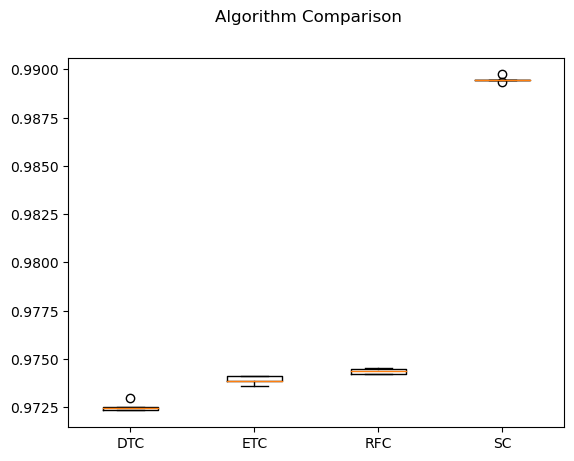

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

stacking Accuracy test set result
0.9916386097475306
ETC accuracy test:
 0.9916386097475306

Confusion Matrix:
 [[ 78828   1738]
 [  1190 268425]]

Classfication report:
               precision    recall  f1-score   support

         DoH       0.99      0.98      0.98     80566
      NonDoH       0.99      1.00      0.99    269615

    accuracy                           0.99    350181
   macro avg       0.99      0.99      0.99    350181
weighted avg       0.99      0.99      0.99    350181



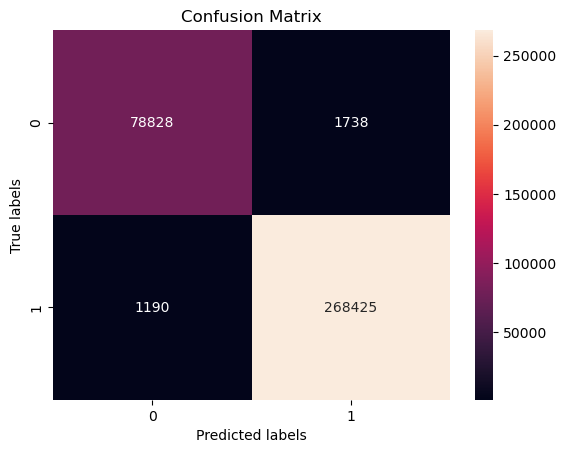

Validating Feature importance
[0.0185943  0.01561969 0.02540119 0.04228348 0.06032019 0.0367437
 0.0666766  0.03575264 0.03006688 0.0535047  0.06769466 0.14398983
 0.08743705 0.06785807 0.00398434 0.01559327 0.0413589  0.00778563
 0.01176564 0.01611912 0.02776919 0.01194008 0.04130338 0.0499867
 0.02045077]


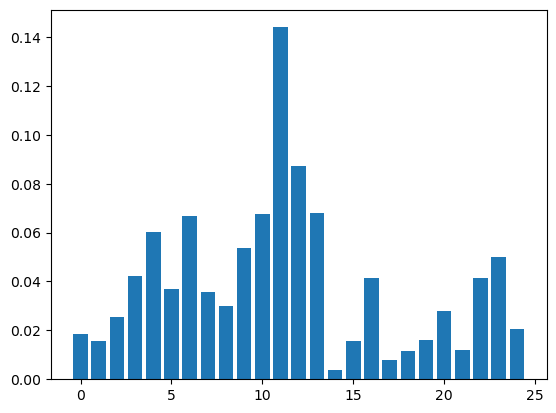

<Axes: >

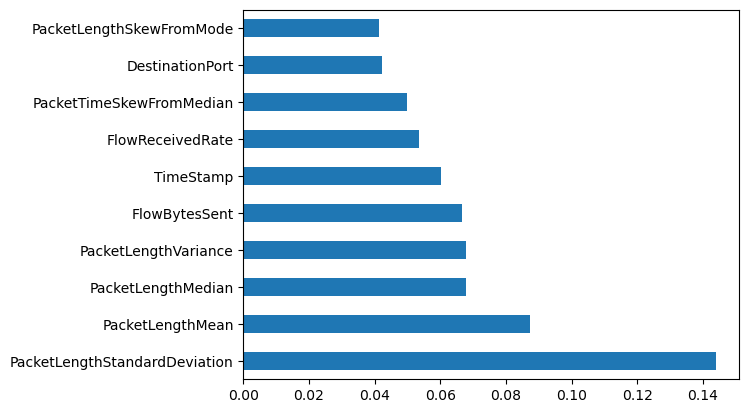

In [19]:
print("stacking Accuracy test set result")
etc = stacking
etc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(etc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_etc = etc.predict(X_test)
print("ETC accuracy test:\n",accuracy_score(Y_test, predictions_etc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_etc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_etc))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(Y_test, predictions_etc)
sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print ("Validating Feature importance")
#fit an Extra Trees model to the data
test_model = ExtraTreesClassifier()
test_model.fit(X_train, Y_train)
#display the relative importance of each attribute
print(test_model.feature_importances_)
#plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:25])
feat_importances.nlargest(10).plot(kind='barh')